Import all libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Load the dataset

In [150]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

Data Exploration

In [151]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [152]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [153]:
df.shape

(100000, 9)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The above shows the dataset structure and give the information below:
    
1.The dataset is made up of 100000 records and 9 variables/columns

2.The non-null count per column alludes to the fact that there are no missing values in the data set. 

3.The date type shows 2 categorical columns and 7 numeric columns

In [155]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

The above confirms there are no missing values

In [156]:
duplicates = df[df.duplicated()]
print(duplicates)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159        

In [157]:
df.drop_duplicates(inplace=True)


In [158]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [159]:
df.shape

(96146, 9)

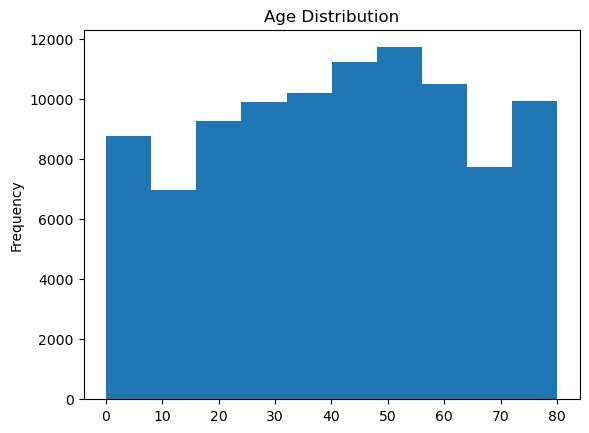

In [160]:
df['age'].plot(kind = 'hist', title = 'Age Distribution');

<Axes: >

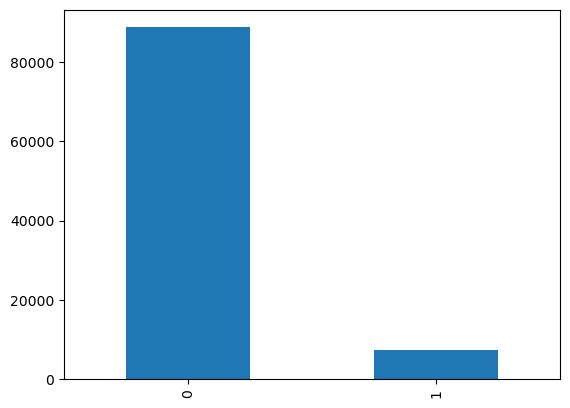

In [161]:
df['hypertension'].value_counts().plot(kind = 'bar')

<Axes: >

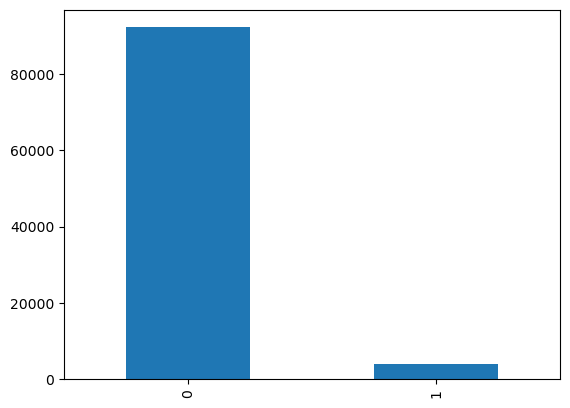

In [162]:
df['heart_disease'].value_counts().plot(kind = 'bar')

<Axes: ylabel='Frequency'>

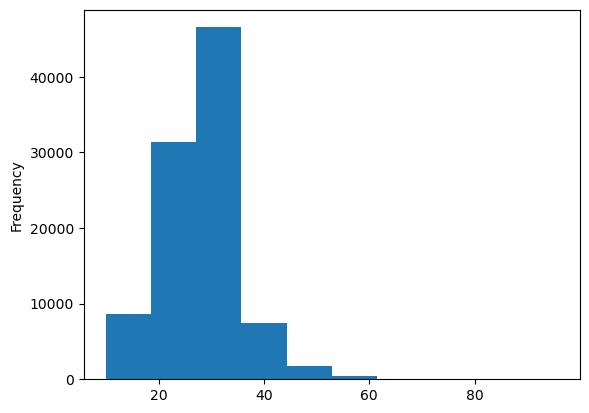

In [163]:
df['bmi'].plot(kind = 'hist')


<Axes: ylabel='Frequency'>

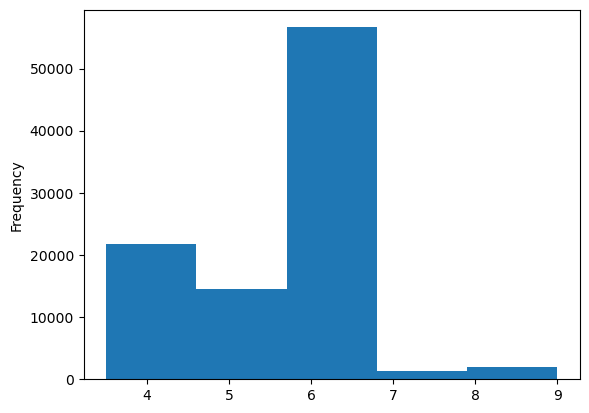

In [164]:
df['HbA1c_level'].plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

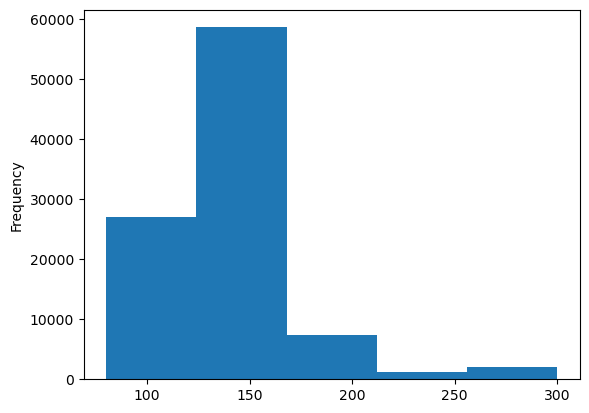

In [165]:
df['blood_glucose_level'].plot(kind = 'hist', bins = 5)

<Axes: >

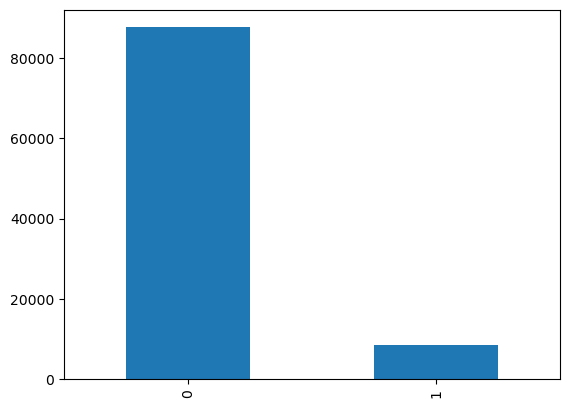

In [166]:
df['diabetes'].value_counts().plot(kind = 'bar')

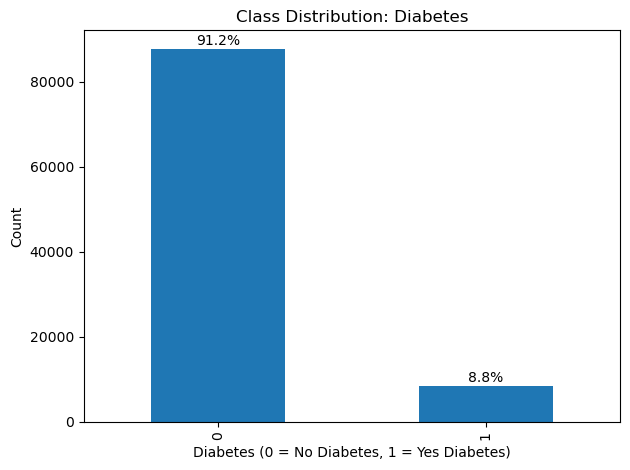

In [167]:
counts = df['diabetes'].value_counts()
total = counts.sum()

ax = counts.plot(kind='bar')
plt.title('Class Distribution: Diabetes')
plt.xlabel('Diabetes (0 = No Diabetes, 1 = Yes Diabetes)')
plt.ylabel('Count')

for i, count in enumerate(counts):
    pct = f'{100 * count / total:.1f}%'
    ax.text(i, count + total * 0.01, pct, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

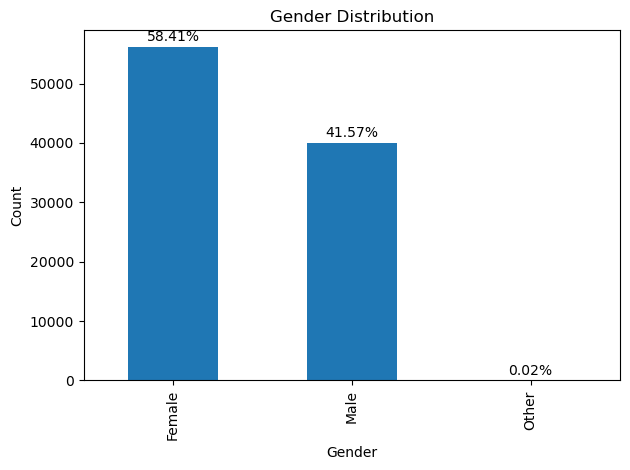

In [171]:
counts = df['gender'].value_counts()
total = counts.sum()

ax = counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for i, count in enumerate(counts):
    pct = f'{100 * count / total:.2f}%'
    ax.text(i, count + total * 0.01, pct, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [20]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [21]:
df['gender'].value_counts().sum()

96146

In [22]:
df['gender'].value_counts(normalize=True)*100

Female    58.412206
Male      41.569072
Other      0.018722
Name: gender, dtype: float64

Relative to the other values in the gender column, the value 'other' is statistically insignificant as it makes only 0.018%

In [23]:
testdf = df

In [24]:
testdf.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [25]:
testdf = testdf[testdf['gender'] != 'Other'].reset_index(drop=True)


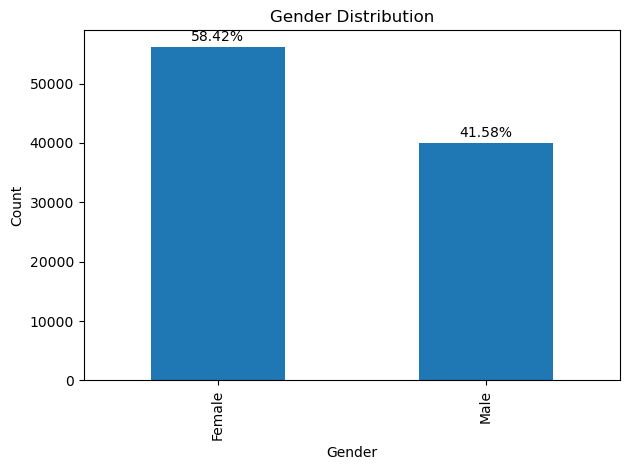

In [172]:
counts = testdf['gender'].value_counts()
total = counts.sum()

ax = counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for i, count in enumerate(counts):
    pct = f'{100 * count / total:.2f}%'
    ax.text(i, count + total * 0.01, pct, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<Axes: >

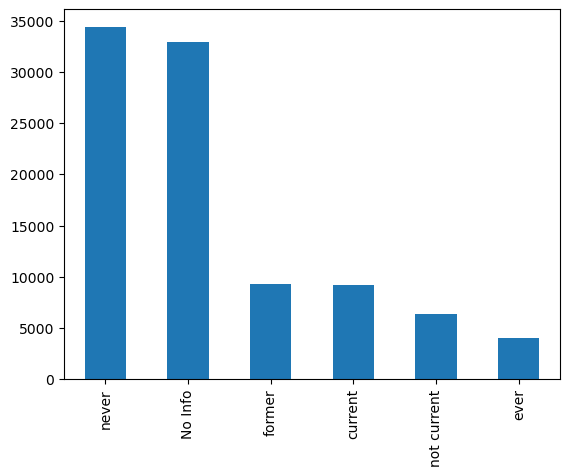

In [27]:
df['smoking_history'].value_counts().plot(kind = 'bar')

In [28]:
df['smoking_history'].value_counts(normalize = True)*100

never          35.776839
No Info        34.205271
former          9.671749
current         9.565661
not current     6.622220
ever            4.158259
Name: smoking_history, dtype: float64

In [29]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [30]:
df['bmi'].skew()

1.0237511657232292

In [31]:
testdf['bmi'].skew()

1.0239450698336303

In [124]:
cleandf['bmi'].skew()

0.061408890992531544

In [32]:
df['age'].skew()

-0.062444736060842554

In [33]:
testdf['age'].skew()

-0.06258541745742473

In [34]:
df['blood_glucose_level'].skew()

0.83648926055032

In [35]:
testdf['blood_glucose_level'].skew()

0.8366146670608997

In [125]:
df['HbA1c_level'].skew()

-0.054463243946481645

In [37]:
testdf['HbA1c_level'].skew()

-0.05432967446134376

In [38]:
testcat = []
testnum = []

for col in df.columns:
    if df[col].nunique() > 10:
        testnum.append(col)
    else:
        testcat.append(col)
        
        

In [39]:
testcat

['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

In [40]:
testnum

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

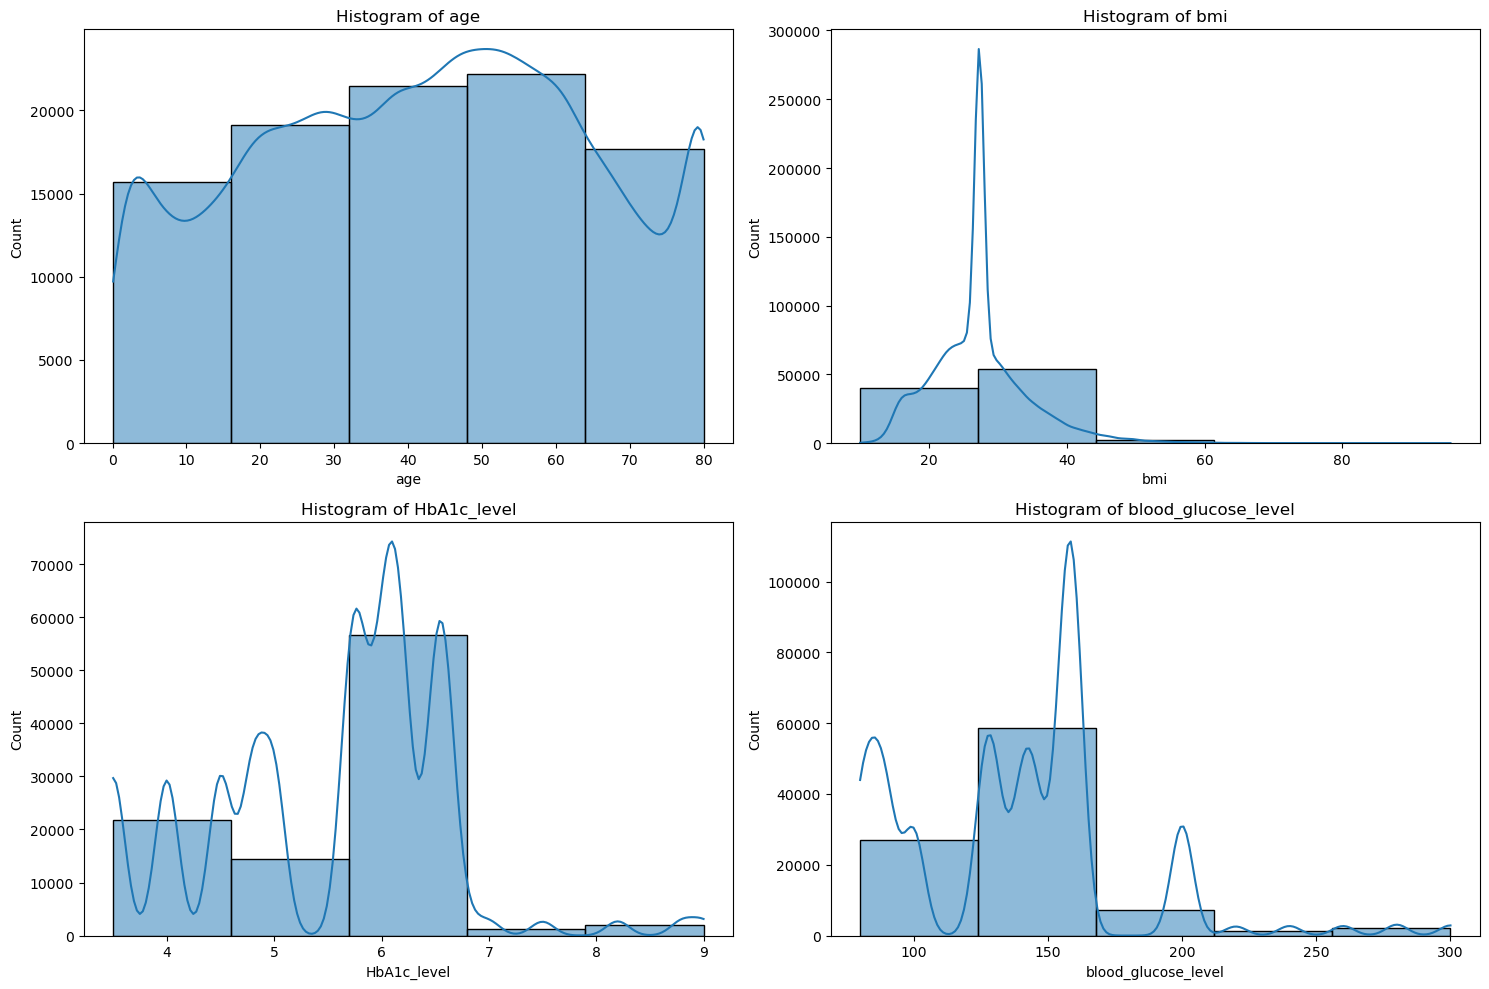

In [127]:
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
position = position.flatten()

for index, column_name in enumerate(testnum):
    sns.histplot(testdf[column_name], ax=position[index], kde = True, bins = 5)
    position[index].set_title(f'Histogram of {column_name}', fontsize=12)
    position[index].set_xlabel(column_name, fontsize=10)

plt.tight_layout()
plt.show()

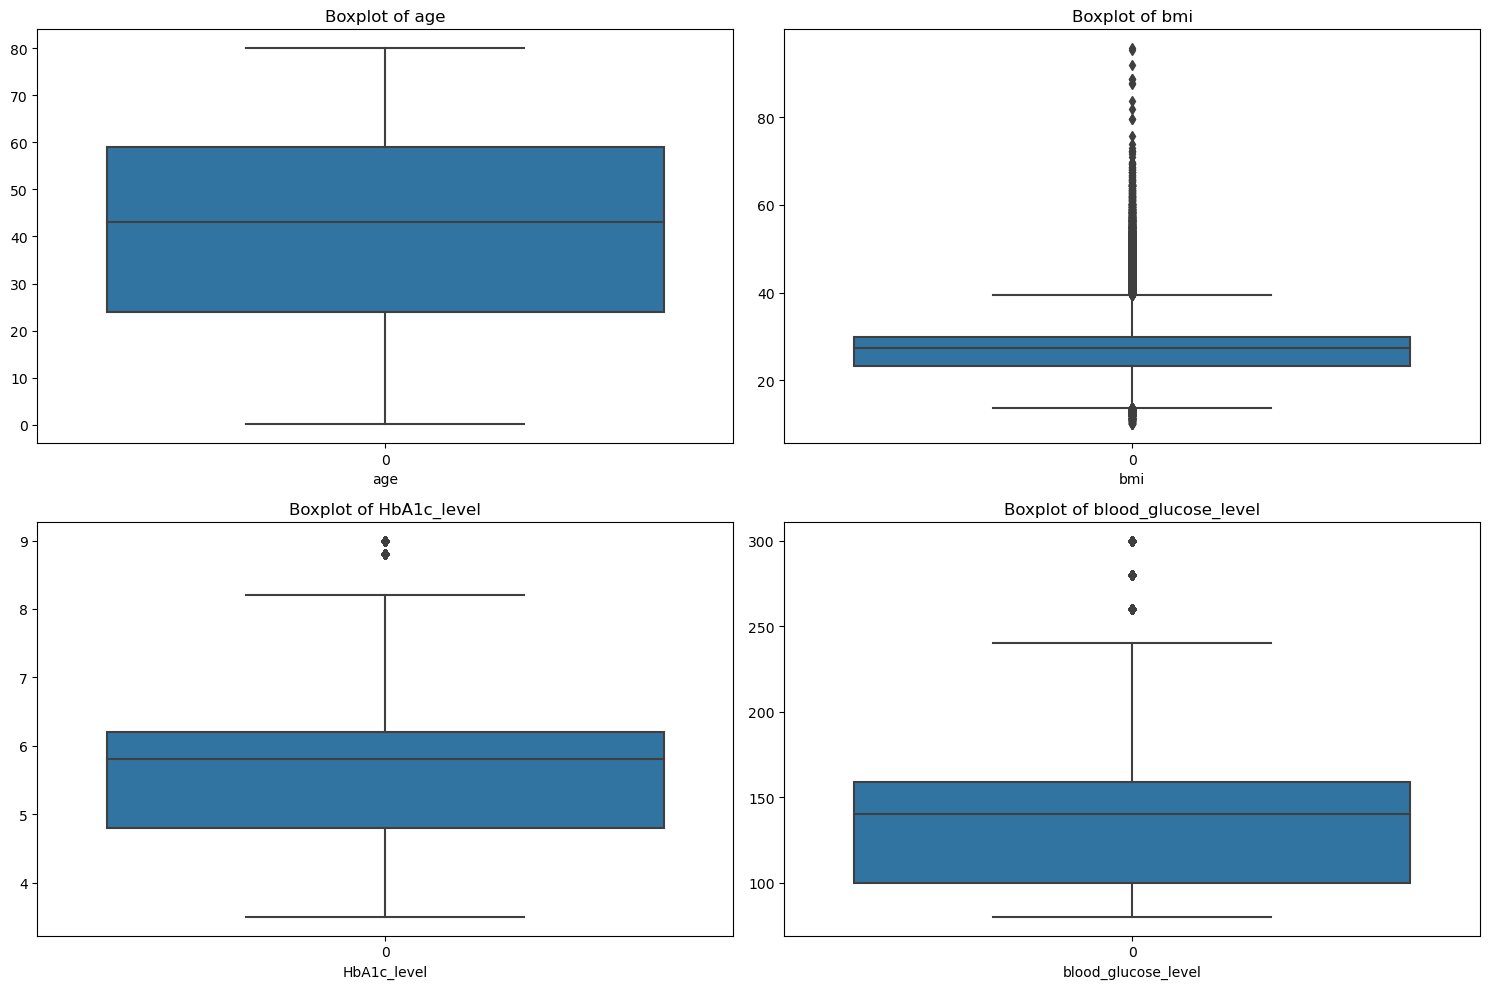

In [119]:
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
position = position.flatten()

for index, column_name in enumerate(testnum):
    sns.boxplot(testdf[column_name], ax=position[index])
    position[index].set_title(f'Boxplot of {column_name}', fontsize=12)
    position[index].set_xlabel(column_name, fontsize=10)

plt.tight_layout()
plt.show()

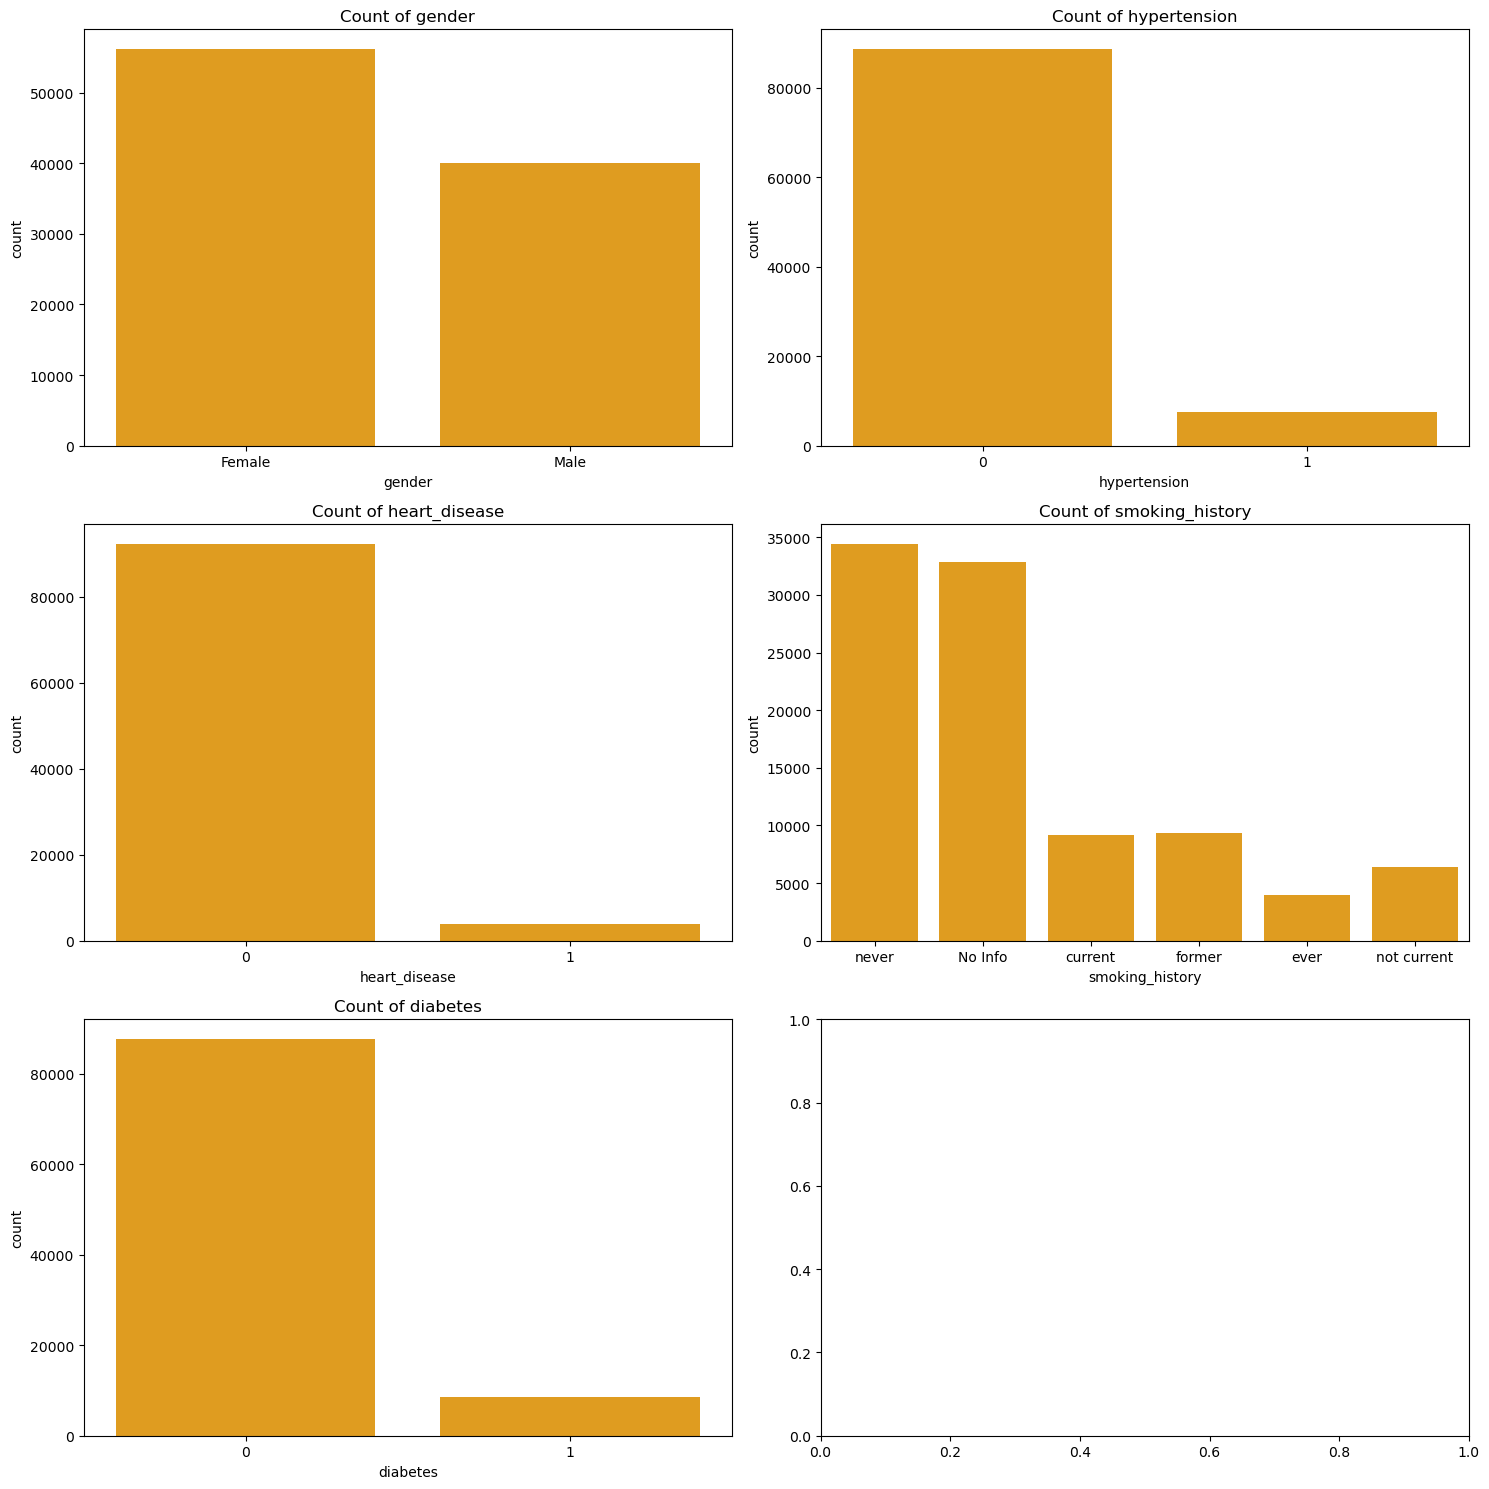

In [42]:
fig, position = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(testcat):
    sns.countplot(x=testdf[column_name], color="orange", ax=position[index])
    position[index].set_title(f'Count of {column_name}', fontsize=12)
    position[index].set_xlabel(column_name, fontsize=10)

plt.tight_layout()
plt.show()

In [43]:
outlier_col = testdf[['bmi', 'HbA1c_level', 'blood_glucose_level']]
z_score =  (outlier_col - outlier_col.mean())/outlier_col.std()
threshold = 1.5
cleandf = testdf[(z_score.abs()<=threshold).all(axis=1)]

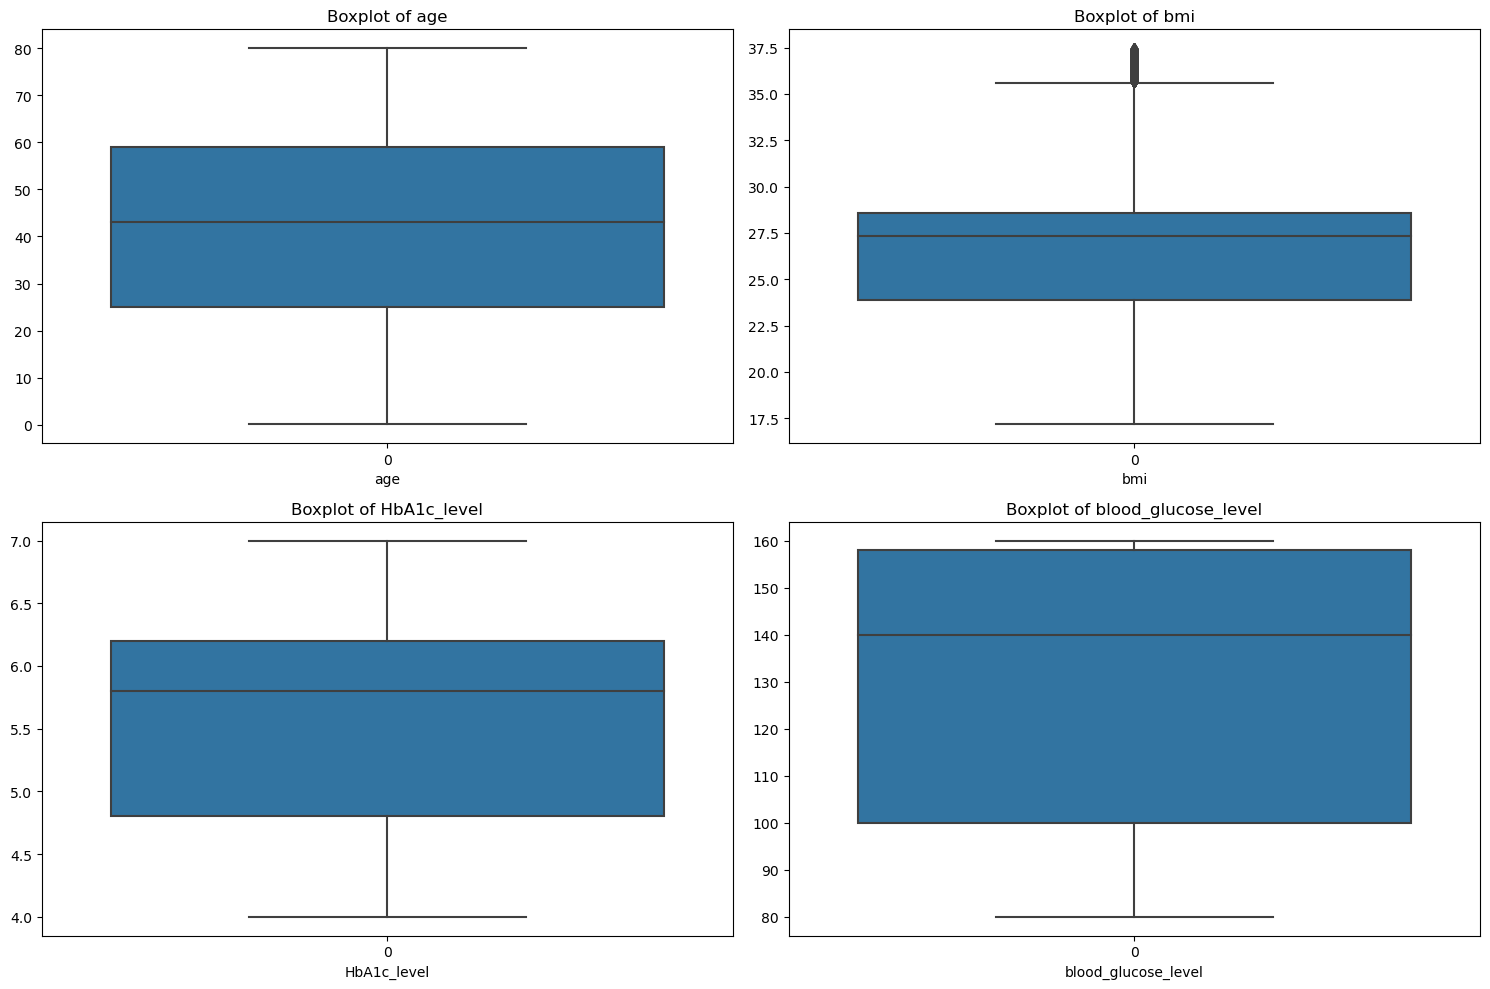

In [174]:
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
position = position.flatten()

for index, column_name in enumerate(testnum):
    sns.boxplot(cleandf[column_name], ax=position[index])
    position[index].set_title(f'Boxplot of {column_name}', fontsize=12)
    position[index].set_xlabel(column_name, fontsize=10)

plt.tight_layout()
plt.show()

Bivariate Analysis

<Axes: xlabel='gender', ylabel='count'>

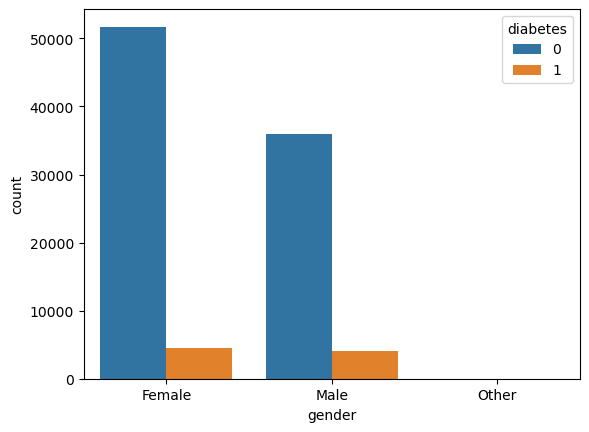

In [45]:
sns.countplot(x='gender', hue='diabetes', data=df)

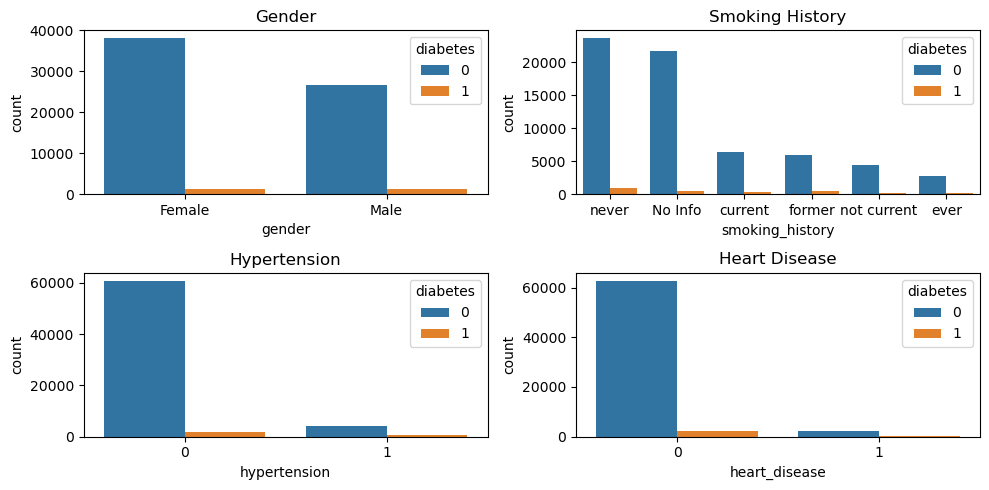

In [46]:
fig, position = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
sns.countplot(x='gender', hue='diabetes', data=cleandf, ax=position[0, 0])
position[0,0].set_title('Gender')
sns.countplot(x='smoking_history', hue='diabetes', data=cleandf, ax=position[0, 1])
position[0,1].set_title('Smoking History')
sns.countplot(x='hypertension', hue='diabetes', data=cleandf, ax=position[1, 0])
position[1,0].set_title('Hypertension')
sns.countplot(x='heart_disease', hue='diabetes', data=cleandf, ax=position[1, 1])
position[1,1].set_title('Heart Disease')

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='bmi'>

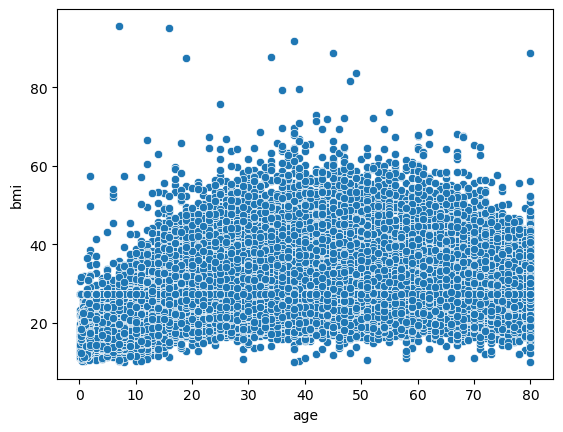

In [47]:
sns.scatterplot(x='age', y='bmi', data=df)

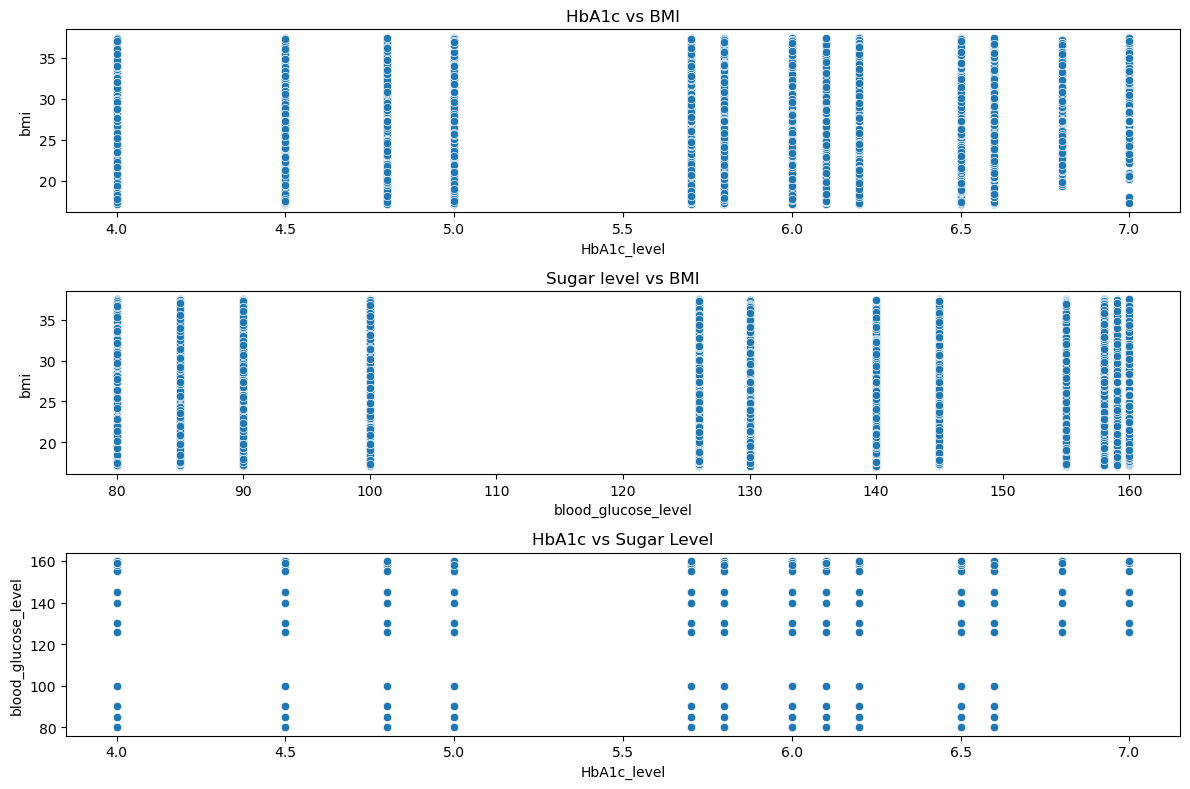

In [117]:
fig, position = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 8))
sns.scatterplot(x='HbA1c_level', y='bmi', data=cleandf, ax=position[0])
position[0].set_title('HbA1c vs BMI')
sns.scatterplot(x='blood_glucose_level', y='bmi', data=cleandf, ax=position[1])
position[1].set_title('Sugar level vs BMI')
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=cleandf, ax=position[2])
position[2].set_title('HbA1c vs Sugar Level')
#sns.countplot(x='heart_disease', hue='diabetes', data=cleandf, ax=position[1, 1])
#position[1,1].set_title('Heart Disease')

plt.tight_layout()
plt.show()

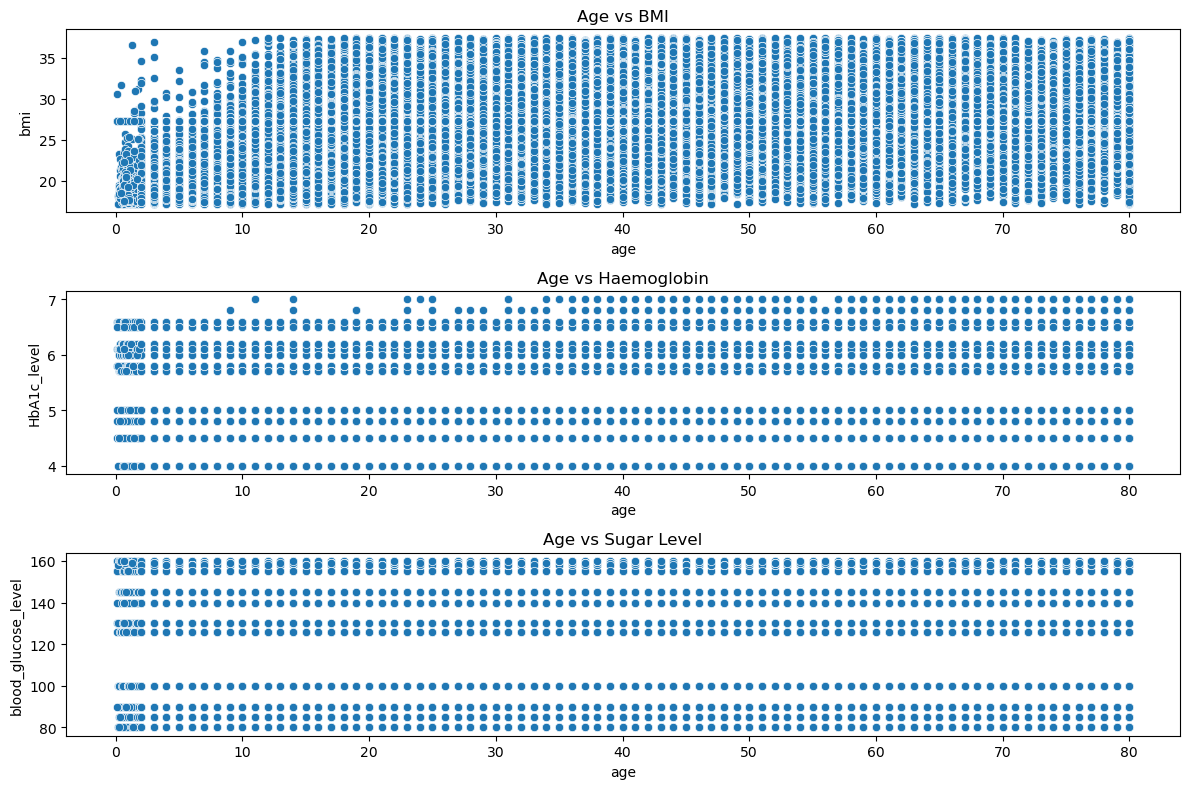

In [116]:
fig, position = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 8))
sns.scatterplot(x='age', y='bmi', data=cleandf, ax=position[0])
position[0].set_title('Age vs BMI')
sns.scatterplot(x='age', y= 'HbA1c_level', data=cleandf, ax=position[1])
position[1].set_title('Age vs Haemoglobin')
sns.scatterplot(x='age', y='blood_glucose_level', data=cleandf, ax=position[2])
position[2].set_title('Age vs Sugar Level')
#sns.countplot(x='heart_disease', hue='diabetes', data=cleandf, ax=position[1, 1])
#position[1,1].set_title('Heart Disease')

plt.tight_layout()
plt.show()

In [111]:
cleandf[testnum].corr()

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.285215,0.026219,0.023559
bmi,0.285215,1.000000,0.016296,0.015278
HbA1c_level,0.026219,0.016296,1.000000,0.016522
blood_glucose_level,0.023559,0.015278,0.016522,1.000000


In [50]:
cleandf.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [51]:
corrdf = cleandf.drop(['smoking_history', 'gender'], axis=1)


In [52]:
corrdf.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.249099,0.232044,0.285215,0.026219,0.023559,0.174708
hypertension,0.249099,1.000000,0.116228,0.113801,0.023741,0.021760,0.132680
heart_disease,0.232044,0.116228,1.000000,0.050954,0.013790,0.010196,0.120779
bmi,0.285215,0.113801,0.050954,1.000000,0.016296,0.015278,0.107148
HbA1c_level,0.026219,0.023741,0.013790,0.016296,1.000000,0.016522,0.162460
blood_glucose_level,0.023559,0.021760,0.010196,0.015278,0.016522,1.000000,0.114242
diabetes,0.174708,0.132680,0.120779,0.107148,0.162460,0.114242,1.000000


<Axes: >

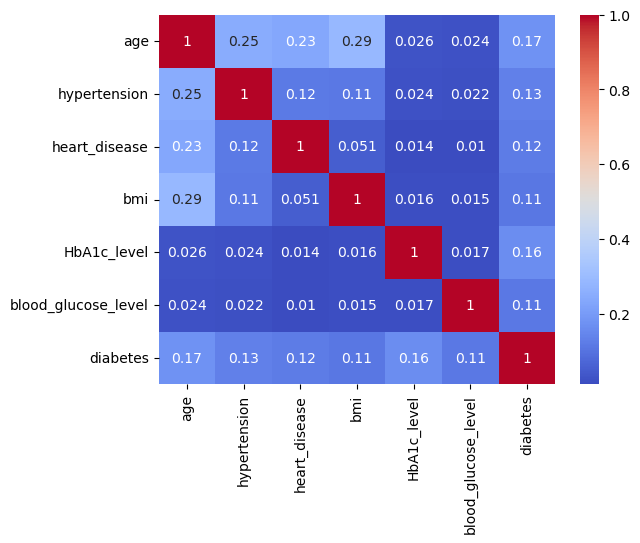

In [53]:
sns.heatmap(corrdf.corr(), annot=True, cmap='coolwarm')

In [54]:
X = cleandf.drop('diabetes', axis = 1)
y = cleandf['diabetes']

In [55]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [57]:
cat_col = X.select_dtypes(include = 'object')

In [58]:
cat_col.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [59]:
encoder = LabelEncoder()

for col_name in cat_col:
    X[col_name] = encoder.fit_transform(X[col_name])

In [60]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_pred, y_test)
matrix = confusion_matrix(y_pred, y_test)

In [65]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13433
           1       0.03      0.40      0.06        35

    accuracy                           0.97     13468
   macro avg       0.51      0.68      0.52     13468
weighted avg       1.00      0.97      0.98     13468



<Axes: >

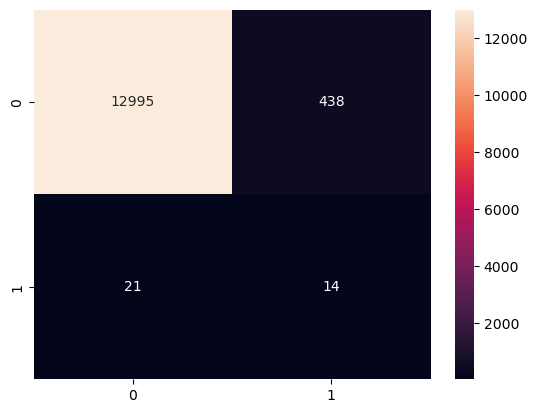

In [66]:
sns.heatmap(matrix, annot = True, fmt = 'g')

Deciding which scaler to use

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [68]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, test_size = 0.2, random_state = 42)

In [69]:
model.fit(Xn_train, yn_train)
yn_pred = model.predict(Xn_test)

In [70]:
reportn = classification_report(yn_pred, yn_test)
matrixn = confusion_matrix(yn_pred, yn_test)

In [71]:
print(reportn)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13403
           1       0.07      0.51      0.13        65

    accuracy                           0.97     13468
   macro avg       0.54      0.74      0.56     13468
weighted avg       0.99      0.97      0.98     13468



<Axes: >

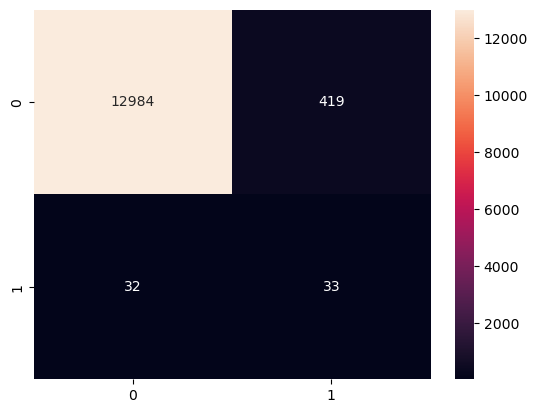

In [72]:
sns.heatmap(matrixn, annot = True, fmt = 'g')

In [73]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
Xnr = scaler.fit_transform(X)

In [74]:
Xnr_train, Xnr_test, ynr_train, ynr_test = train_test_split(Xnr, y, test_size = 0.2, random_state = 42)

In [75]:
model.fit(Xnr_train, ynr_train)
ynr_pred = model.predict(Xnr_test)

In [76]:
reportnr = classification_report(ynr_pred, ynr_test)
matrixnr = confusion_matrix(ynr_pred, ynr_test)

In [77]:
print(reportnr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13404
           1       0.07      0.52      0.13        64

    accuracy                           0.97     13468
   macro avg       0.54      0.74      0.56     13468
weighted avg       0.99      0.97      0.98     13468



<Axes: >

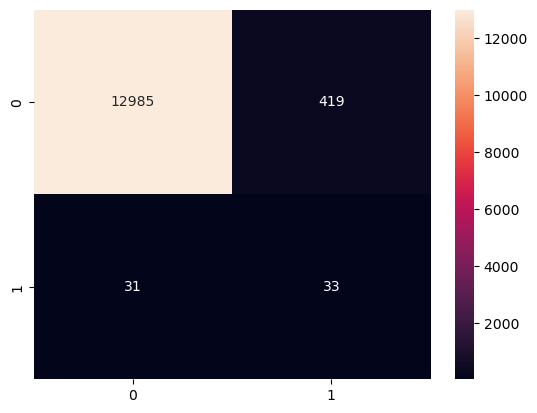

In [78]:
sns.heatmap(matrixnr, annot = True, fmt = 'g')

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     10440
           1       0.83      0.12      0.22      3028

    accuracy                           0.80     13468
   macro avg       0.81      0.56      0.55     13468
weighted avg       0.80      0.80      0.73     13468



<Axes: >

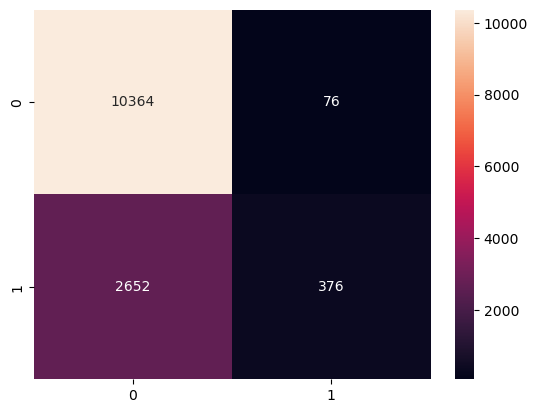

In [79]:
#modelnr = LogisticRegression(random_state = 42, class_weight={0:1, 1:4})
modelnr = LogisticRegression(random_state = 42, class_weight= 'balanced', max_iter = 2000)
modelnr.fit(Xnr_train, ynr_train)
ynr_pred = modelnr.predict(Xnr_test)
reportnr = classification_report(ynr_pred, ynr_test)
matrixnr = confusion_matrix(ynr_pred, ynr_test)
print(reportnr)
sns.heatmap(matrixnr, annot = True, fmt = 'g')

The above is a baseline model

In [80]:
testdf['diabetes'].value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

In [81]:
xgb_balance = (testdf['diabetes'] == 0).sum()/(df['diabetes'] == 1).sum()
print(xgb_balance)

10.333176137703372


Model Comparison

In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [175]:
classifiers = [
    [LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42), 'Logistic Regression'],
    [RandomForestClassifier(class_weight='balanced', random_state=42), 'Random Forest'],
    [SVC(class_weight='balanced', probability=True, random_state=42), 'SVM']
]



<--Logistic Regression-->
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     13016
           1       0.12      0.83      0.22       452

    accuracy                           0.80     13468
   macro avg       0.56      0.81      0.55     13468
weighted avg       0.96      0.80      0.86     13468



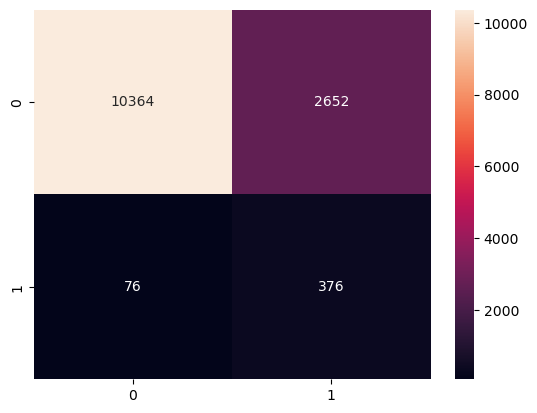

<--Random Forest-->
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13016
           1       0.69      0.20      0.31       452

    accuracy                           0.97     13468
   macro avg       0.83      0.60      0.65     13468
weighted avg       0.96      0.97      0.96     13468



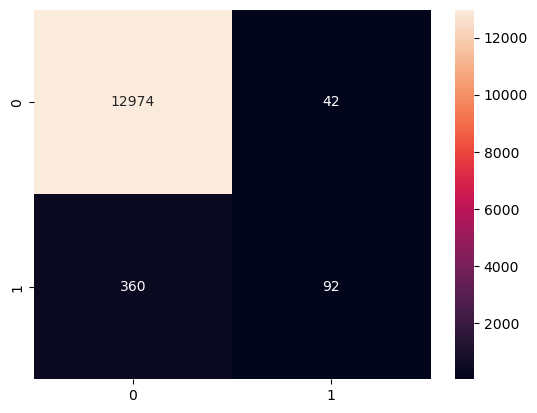

<--SVM-->
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     13016
           1       0.13      0.92      0.23       452

    accuracy                           0.80     13468
   macro avg       0.57      0.86      0.56     13468
weighted avg       0.97      0.80      0.86     13468



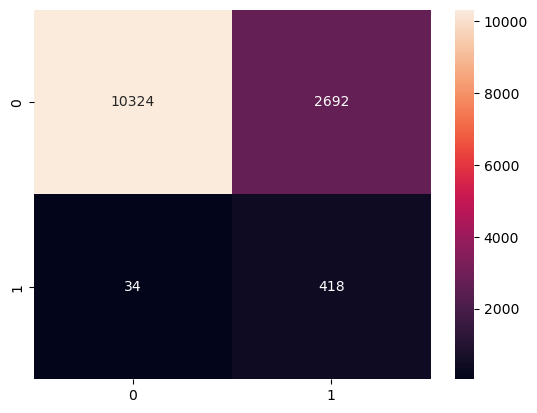

In [176]:
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f'<--{model_name}-->')
    model.fit(Xnr_train, ynr_train)
    predictions = model.predict(Xnr_test)
    report = classification_report(ynr_test, predictions)
    matrix = confusion_matrix(ynr_test, predictions)
    print(report)
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.show()

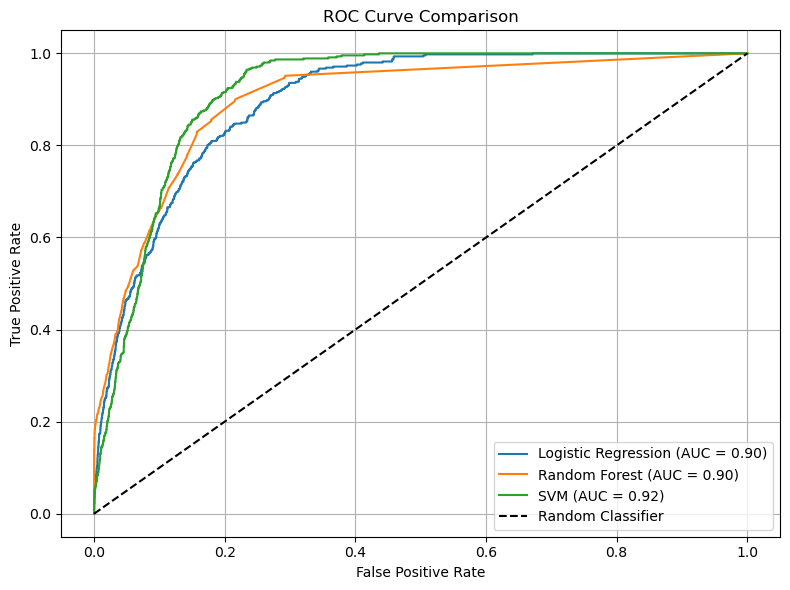

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve



roc_results = {}

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    
   
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(Xnr_test)[:, 1] 
    else:
       
        y_score = model.decision_function(Xnr_test)
    
  
    fpr, tpr, _ = roc_curve(ynr_test, y_score)
    auc_score = roc_auc_score(ynr_test, y_score)
    roc_results[model_name] = (fpr, tpr, auc_score)


plt.figure(figsize=(8, 6))
for model_name, (fpr, tpr, auc_score) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


From the analysis the superior model is the SVM. 

Hyperparameter tuning will be done using GridSearchCV to select the best combination of parameters for my model

In [86]:
SVC()

SVC()

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [88]:
parameter_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'] 
}

In [89]:
classifiers[2][0]

SVC(class_weight='balanced', probability=True, random_state=42)

In [90]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [91]:
grid_search = GridSearchCV(classifiers[2][0],
                           param_grid = parameter_grid, 
                           cv = cv,
                           scoring = 'roc_auc',
                           n_jobs = -1
                          
)
                         


In [92]:
grid_search.fit(Xnr_train, ynr_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [93]:
grid_search.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Use the best parameters to re-train the model

In [179]:
from sklearn.svm import SVC

svc1 = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced', probability=True, random_state=42)
svc1.fit(Xnr_train, ynr_train)


SVC(C=1, class_weight='balanced', probability=True, random_state=42)

In [95]:
from sklearn.metrics import roc_auc_score


In [96]:
ynr_pred = svc1.predict(Xnr_test)
ynr_proba = svc1.predict_proba(Xnr_test)[:, 1]

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     13016
           1       0.13      0.92      0.23       452

    accuracy                           0.80     13468
   macro avg       0.57      0.86      0.56     13468
weighted avg       0.97      0.80      0.86     13468

0.91670335285095


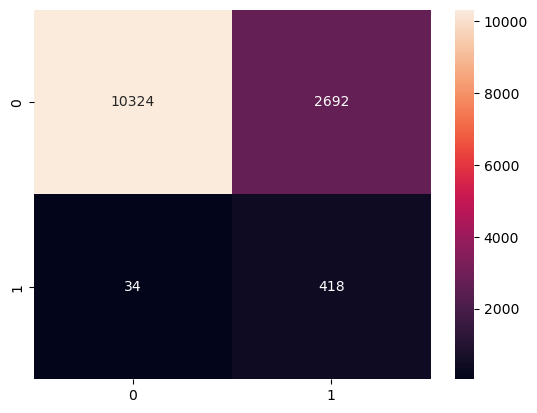

In [97]:
report = classification_report(ynr_test, ynr_pred)
matrix = confusion_matrix(ynr_test, ynr_pred)
roc_auc = roc_auc_score(ynr_test, ynr_proba)
print(report)
print(roc_auc)
sns.heatmap(matrix, annot = True, fmt = 'g')
plt.show()

In [99]:
 classifiers[0][0]

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)